In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

**DATA ACQUISTION**

In [4]:
df_fhs = pd.read_csv("/content/heart_disease_uci.csv")

In [5]:
df_fhs.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,920.000,460.500,265.725,1.000,230.750,460.500,690.250,920.000
age,920.000,53.511,9.425,28.000,47.000,54.000,60.000,77.000
trestbps,861.000,132.132,19.066,0.000,120.000,130.000,140.000,200.000
chol,890.000,199.130,110.781,0.000,175.000,223.000,268.000,603.000
thalch,865.000,137.546,25.926,60.000,120.000,140.000,157.000,202.000
oldpeak,858.000,0.879,1.091,-2.600,0.000,0.500,1.500,6.200
ca,309.000,0.676,0.936,0.000,0.000,0.000,1.000,3.000
num,920.000,0.996,1.143,0.000,0.000,1.000,2.000,4.000


2. **Filtering Dataset**

In [8]:
df_fhs = df_fhs.drop(['num'], axis=1)

In [9]:
df_fhs.shape

(920, 15)

In [10]:
df_fhs.isnull()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
916,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True
917,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
918,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True


In [11]:
df_fhs.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [12]:
df_fhs.isnull().sum()/len(df_fhs)*100

id          0.000
age         0.000
sex         0.000
dataset     0.000
cp          0.000
trestbps    6.413
chol        3.261
fbs         9.783
restecg     0.217
thalch      5.978
exang       5.978
oldpeak     6.739
slope      33.587
ca         66.413
thal       52.826
dtype: float64

In [13]:
import missingno as mano

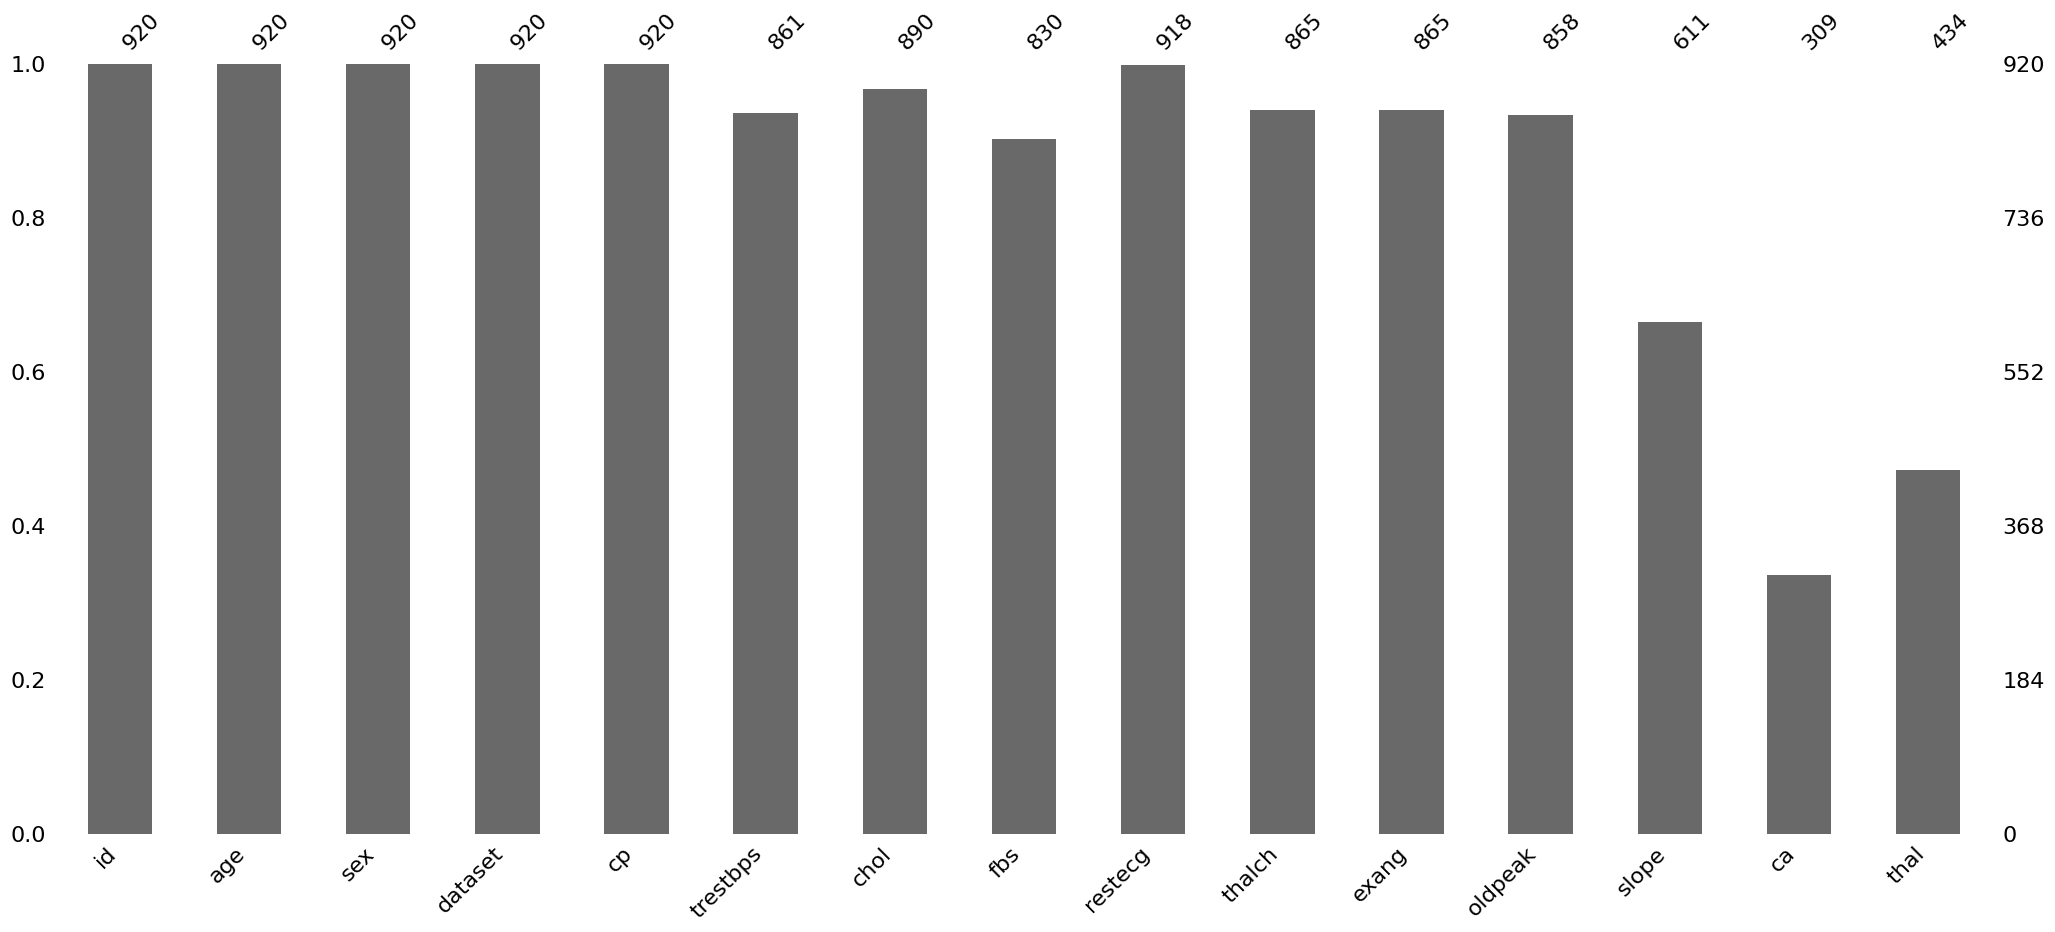

In [14]:
mano.bar(df_fhs)
plt.show()

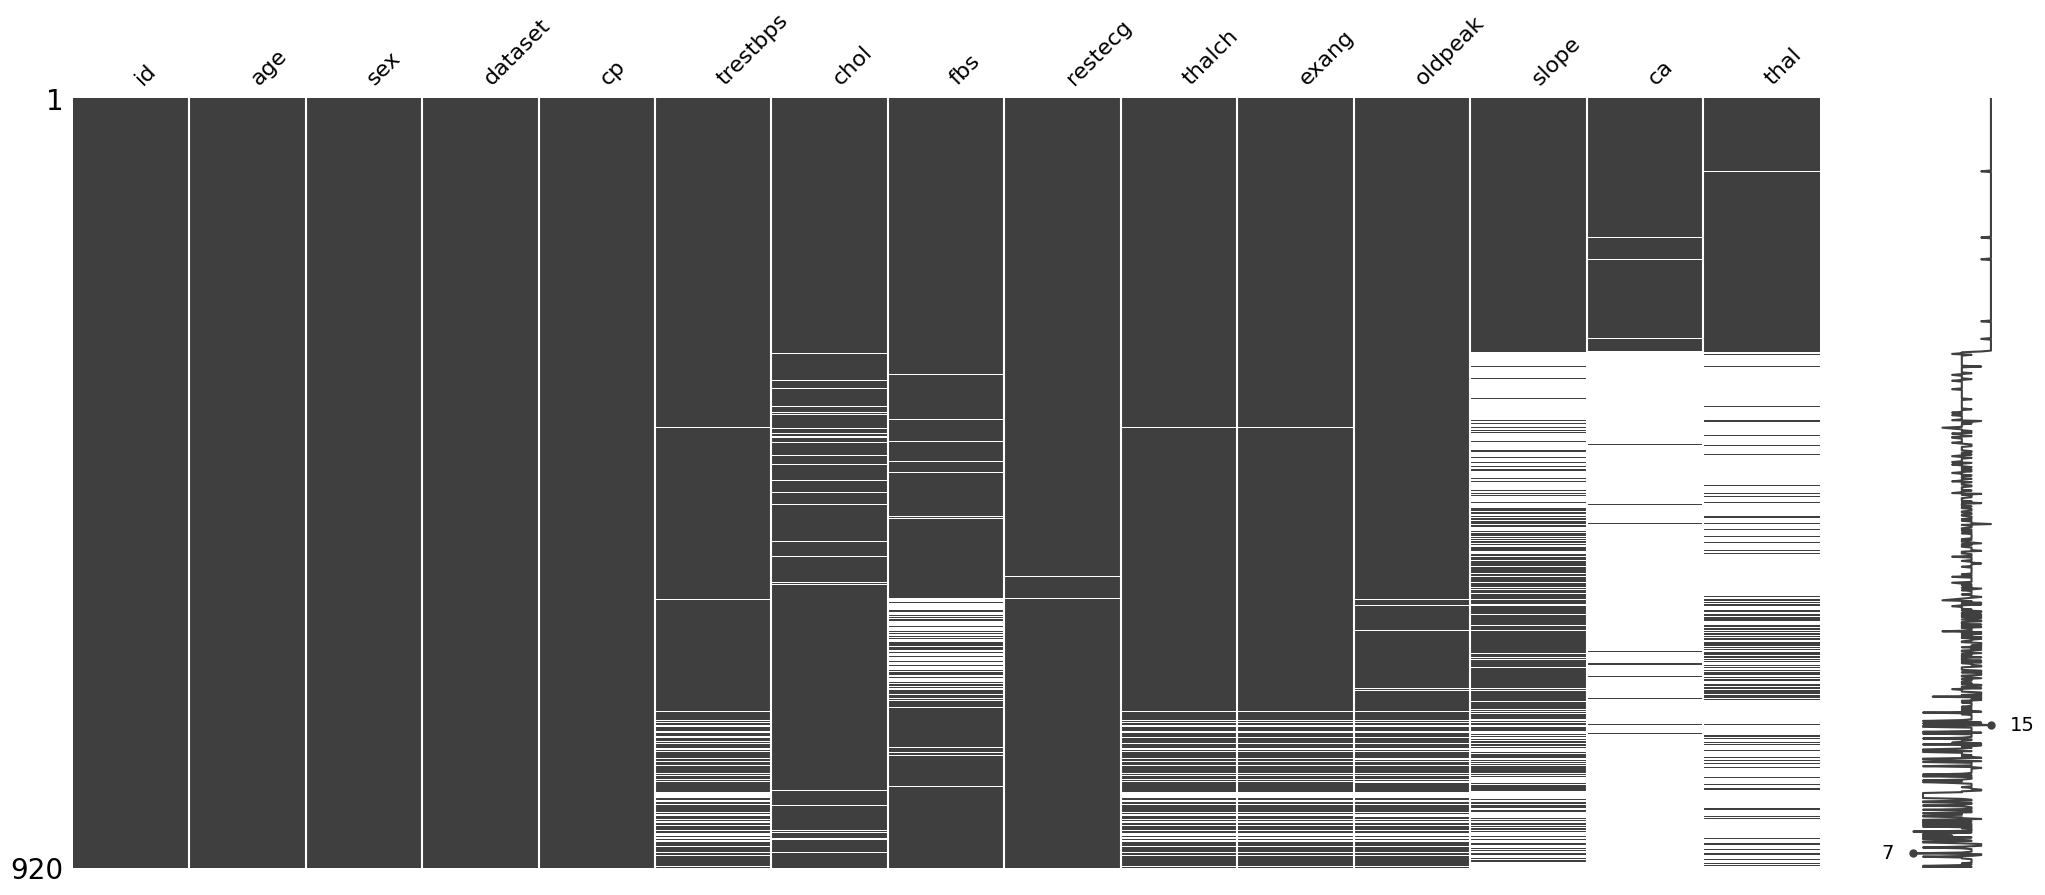

In [15]:
mano.matrix(df_fhs)
plt.show()

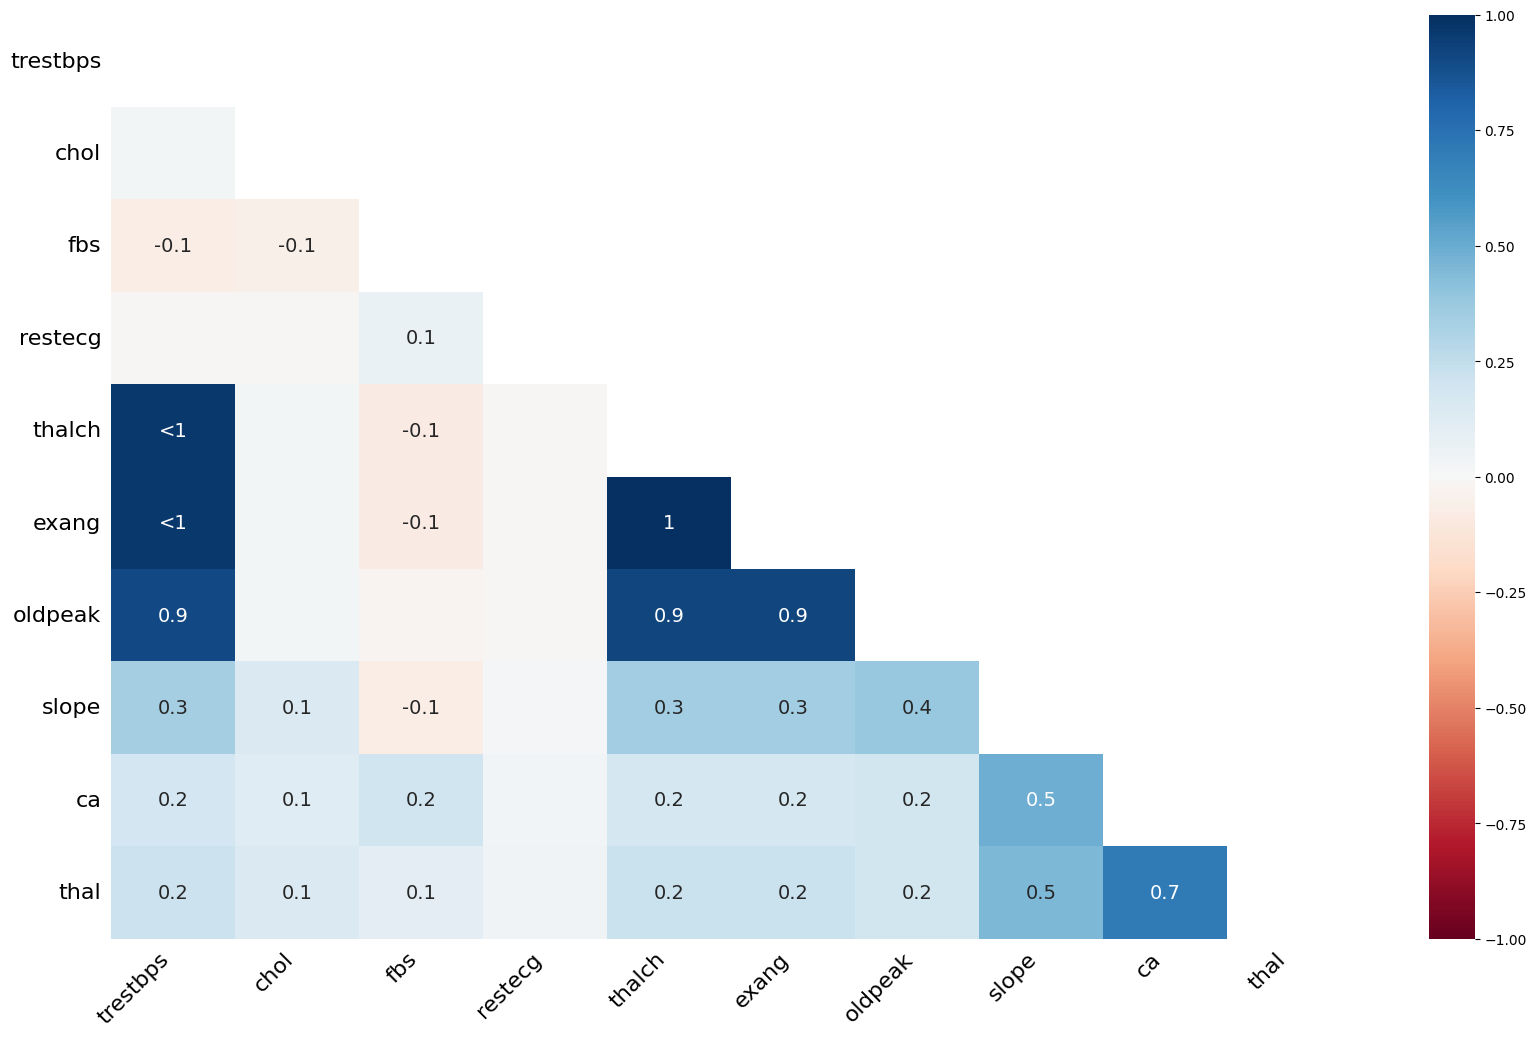

In [16]:
import missingno as mano
mano.heatmap(df_fhs)
plt.show()

In [17]:
df_fhs['ca'] = df_fhs['ca'].fillna(df_fhs['ca'].mean())

In [18]:
(df_fhs.isnull().sum()*100/len(df_fhs))

id          0.000
age         0.000
sex         0.000
dataset     0.000
cp          0.000
trestbps    6.413
chol        3.261
fbs         9.783
restecg     0.217
thalch      5.978
exang       5.978
oldpeak     6.739
slope      33.587
ca          0.000
thal       52.826
dtype: float64

In [19]:
df_fhs=df_fhs.dropna()

In [20]:
(df_fhs.isnull().sum() * 100) / len(df_fhs)

id         0.000
age        0.000
sex        0.000
dataset    0.000
cp         0.000
trestbps   0.000
chol       0.000
fbs        0.000
restecg    0.000
thalch     0.000
exang      0.000
oldpeak    0.000
slope      0.000
ca         0.000
thal       0.000
dtype: float64

In [21]:
df_fhs.duplicated().sum()

0

In [22]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 903
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        371 non-null    int64  
 1   age       371 non-null    int64  
 2   sex       371 non-null    object 
 3   dataset   371 non-null    object 
 4   cp        371 non-null    object 
 5   trestbps  371 non-null    float64
 6   chol      371 non-null    float64
 7   fbs       371 non-null    object 
 8   restecg   371 non-null    object 
 9   thalch    371 non-null    float64
 10  exang     371 non-null    object 
 11  oldpeak   371 non-null    float64
 12  slope     371 non-null    object 
 13  ca        371 non-null    float64
 14  thal      371 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 46.4+ KB


In [23]:
df_fhs['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [24]:
df_fhs['slope'].value_counts(normalize=True)

flat          0.518
upsloping     0.410
downsloping   0.073
Name: slope, dtype: float64

In [25]:
df_fhs['slope']=df_fhs['slope'].replace(['downsloping', 'flat', 'upsloping'],[1,2,3])

In [26]:
df_fhs['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [27]:
df_fhs['thal']=df_fhs['thal'].replace(['fixed defect', 'normal', 'reversable defect'],[1,2,3])

In [28]:
pd.get_dummies(df_fhs['slope'])

,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
890,0,1,0
891,0,1,0
892,0,1,0
902,1,0,0


In [29]:
df_fhs['slope'].unique()

array([1, 2, 3])

In [134]:
age_bins = [-float('inf'), 25, 40, 55, 70, float('inf')]
age_labels = ['25', '26 40', '41 55', '56 70', ' 70']

df_fhs['age_new'] = pd.cut(df_fhs['age_new'], bins=age_bins, labels=age_labels, right=False)

KeyError: 'age_new'

In [132]:
df_fhs['age_group'] = df_fhs['age_new'].replace(['26 40', '41 55', '56 70', ' 70', ' 25'],
                                            ['young_adults', 'adults', 'middle aged', 'old', 'youth'])


KeyError: 'age_new'

In [32]:
df_fhs['age_group'].value_counts()

middle_aged     191
adults          147
young_adults     19
old              14
youth             0
Name: age_group, dtype: int64

<Axes: >

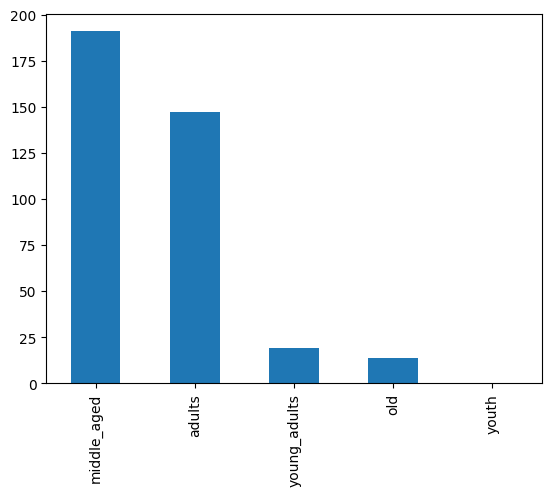

In [33]:
df_fhs['age_group'].value_counts().plot(kind='bar')

In [34]:
pd.get_dummies(df_fhs['age_group'])

,youth,young_adults,adults,middle_aged,old
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
890,0,0,1,0,0
891,0,1,0,0,0
892,0,0,0,1,0
902,0,0,0,1,0


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
df_fhs['sex'].value_counts()

Male      268
Female    103
Name: sex, dtype: int64

In [38]:
df_fhs['cp'].value_counts(normalize=True)

asymptomatic      0.534
non-anginal       0.261
atypical angina   0.140
typical angina    0.065
Name: cp, dtype: float64

<Axes: >

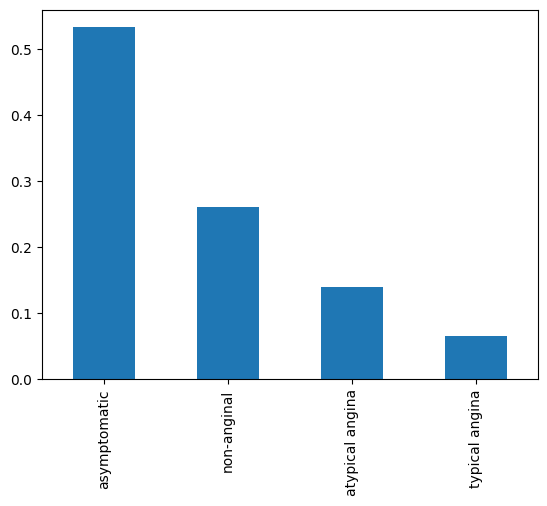

In [39]:
df_fhs['cp'].value_counts(normalize=True).plot(kind='bar')

In [40]:
df_fhs.groupby('sex').mean()

<ipython-input-40-b826b175e0f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fhs.groupby('sex').mean()


,id,trestbps,chol,thalch,oldpeak,slope,ca,thal
sex,,,,,,,,
Female,194.854,134.641,256.699,149.990,0.884,2.408,0.561,2.136
Male,272.709,131.175,199.623,141.299,1.063,2.310,0.716,2.437


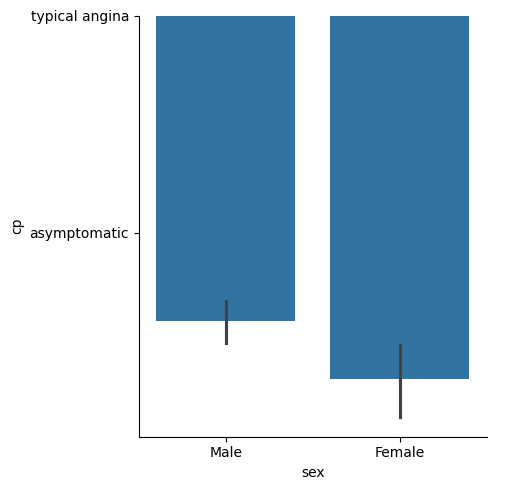

In [41]:
sns.catplot(data=df_fhs,y='cp',x='sex',kind='bar')
plt.show()

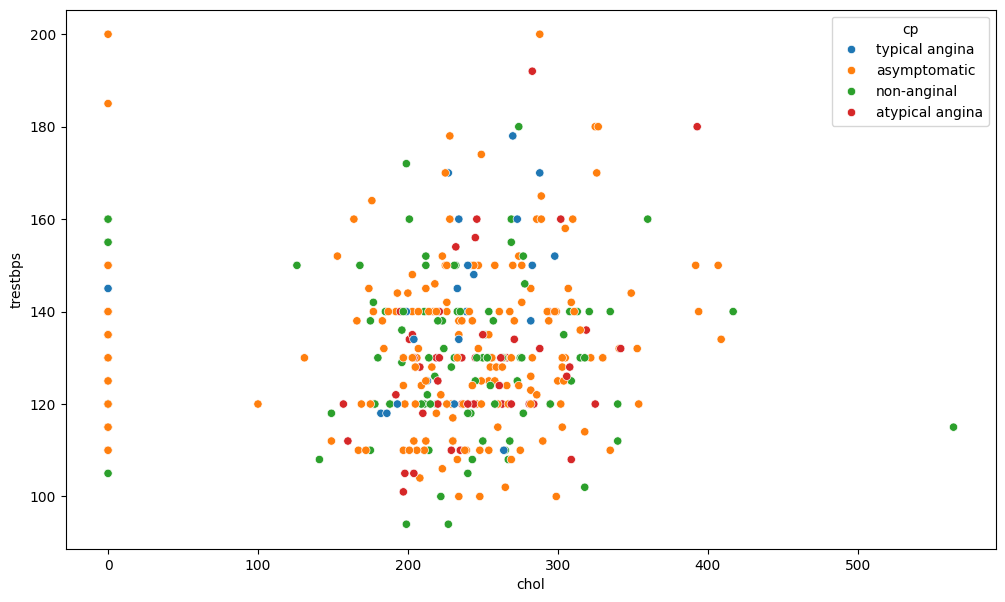

In [42]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_fhs, y='trestbps', x='chol',hue='cp')
plt.show()

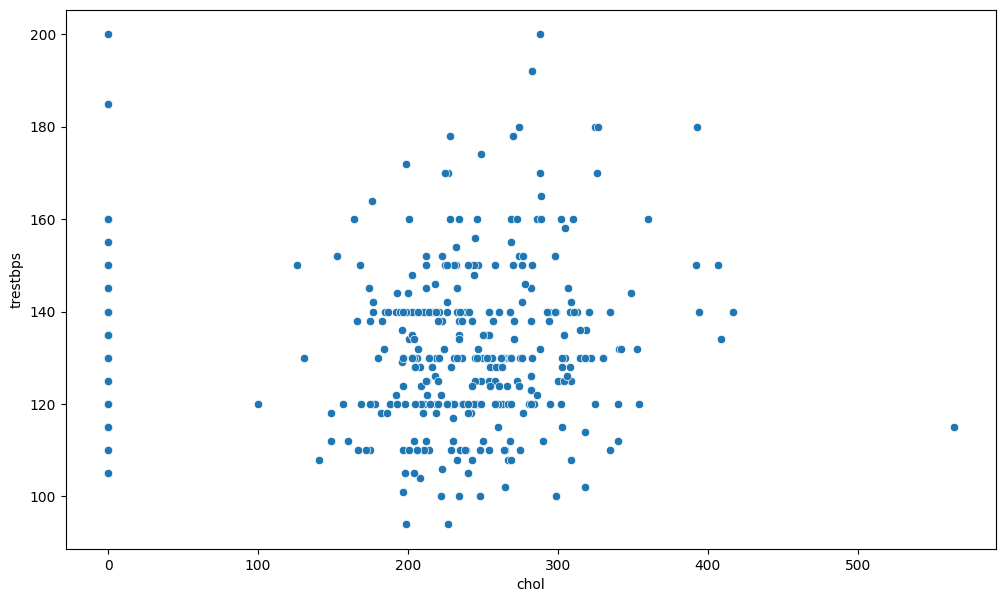

In [43]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_fhs, y='trestbps', x='chol')
plt.show()

In [44]:
fhs_cat = df_fhs.select_dtypes(include=['category'])
fhs_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 903
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        371 non-null    category
 1   age_group  371 non-null    category
dtypes: category(2)
memory usage: 4.0 KB


In [45]:
df_fhs.nunique().sort_values()

sex            2
fbs            2
exang          2
restecg        3
slope          3
thal           3
age            4
dataset        4
cp             4
age_group      4
ca             5
oldpeak       42
trestbps      51
thalch       102
chol         160
id           371
dtype: int64

In [46]:
col_int = df_fhs.nunique().reset_index()
col_int.columns = ['features', 'categories']
col_int['categories'] = col_int['categories'].astype('int64')
col_int = col_int.sort_values(by='categories')
col_int = col_int[col_int.categories < 10]
col_int['features'].values

array(['sex', 'fbs', 'exang', 'restecg', 'slope', 'thal', 'age',
       'dataset', 'cp', 'age_group', 'ca'], dtype=object)

In [47]:
fhs_cat.nunique().sort_values()

age          4
age_group    4
dtype: int64

In [48]:
df_fhs.nunique().sort_values()

sex            2
fbs            2
exang          2
restecg        3
slope          3
thal           3
age            4
dataset        4
cp             4
age_group      4
ca             5
oldpeak       42
trestbps      51
thalch       102
chol         160
id           371
dtype: int64

In [49]:
col_int=df_fhs.nunique().reset_index()
col_int

,index,0
0,id,371
1,age,4
2,sex,2
3,dataset,4
4,cp,4
5,trestbps,51
6,chol,160
7,fbs,2
8,restecg,3
9,thalch,102


In [50]:
col_int.columns=['features','categories']
col_int['categories']=col_int['categories'].astype('int64')

In [51]:
col_int=col_int.sort_values(by='categories')
col_int=col_int[col_int.categories<10]
col_int.features.values

array(['sex', 'fbs', 'exang', 'restecg', 'slope', 'thal', 'age',
       'dataset', 'cp', 'age_group', 'ca'], dtype=object)

In [52]:
fhs_catt=df_fhs[col_int.features.values]
fhs_cat

,age,age_group
0,56-70,middle_aged
1,56-70,middle_aged
2,56-70,middle_aged
3,26-40,young_adults
4,41-55,adults
...,...,...
890,41-55,adults
891,26-40,young_adults
892,56-70,middle_aged
902,56-70,middle_aged


<Axes: xlabel='age_group', ylabel='count'>

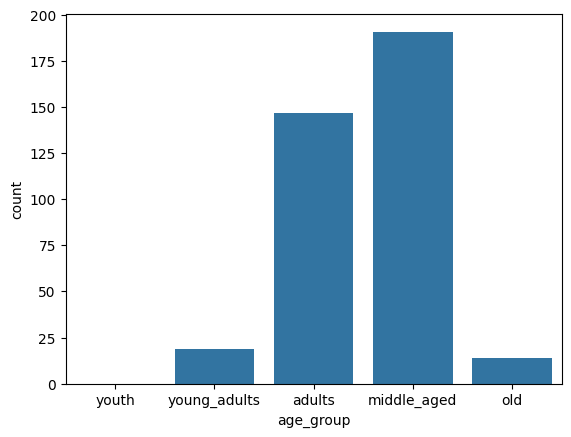

In [53]:
sns.countplot(data=fhs_cat,x='age_group')

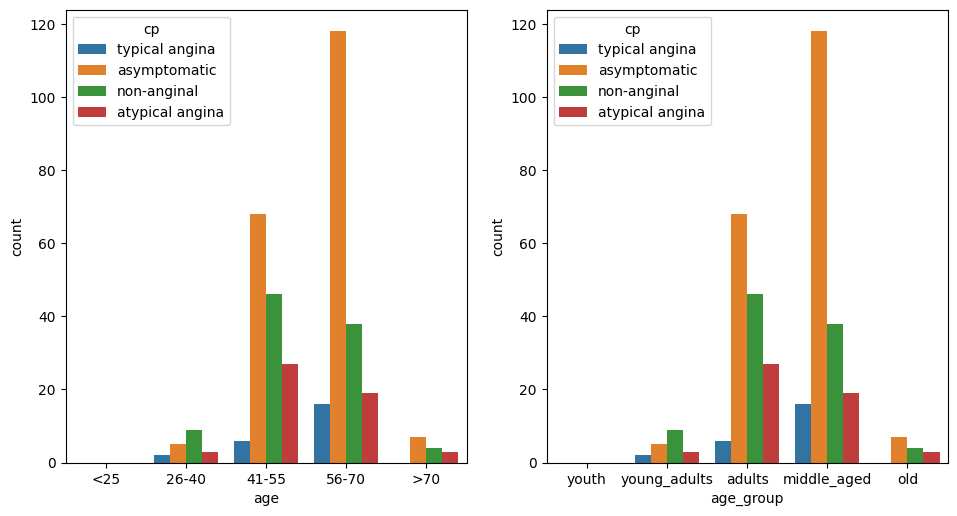

In [54]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(df_fhs.select_dtypes(include='category').columns):
    plt.subplot(3, 5, i + 1)
    sns.countplot(x=col, hue='cp', data=df_fhs)

plt.show()


In [55]:
import matplotlib.pyplot as plt


In [56]:
fhs_cont=df_fhs.select_dtypes(include=['float'])
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 903
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  371 non-null    float64
 1   chol      371 non-null    float64
 2   thalch    371 non-null    float64
 3   oldpeak   371 non-null    float64
 4   ca        371 non-null    float64
dtypes: float64(5)
memory usage: 17.4 KB


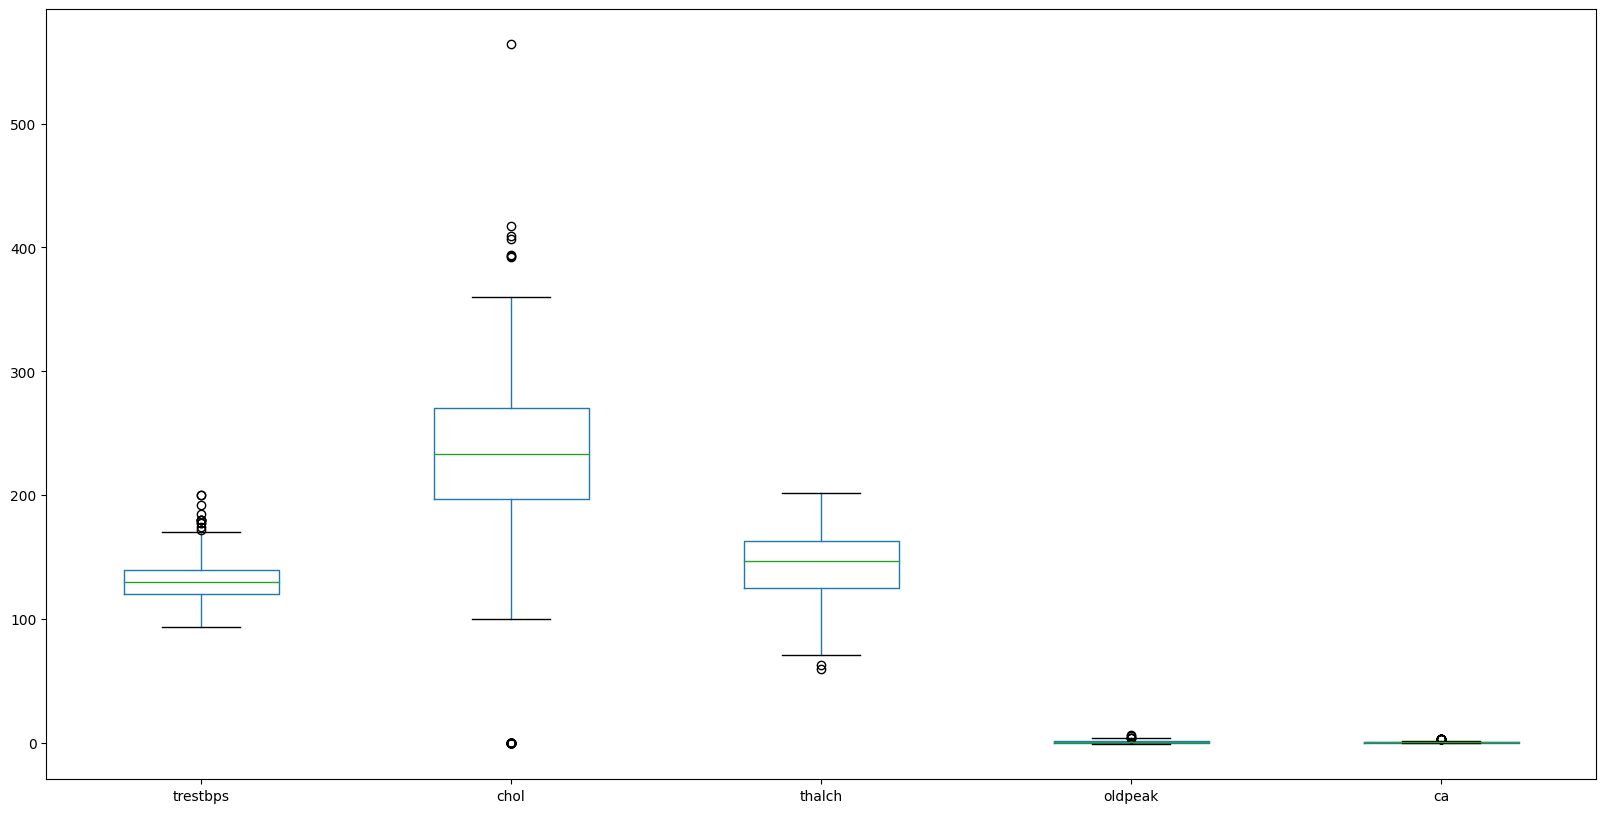

In [57]:
plt.figure(figsize=(20, 10))
fhs_cont.boxplot(grid=False)
plt.show()

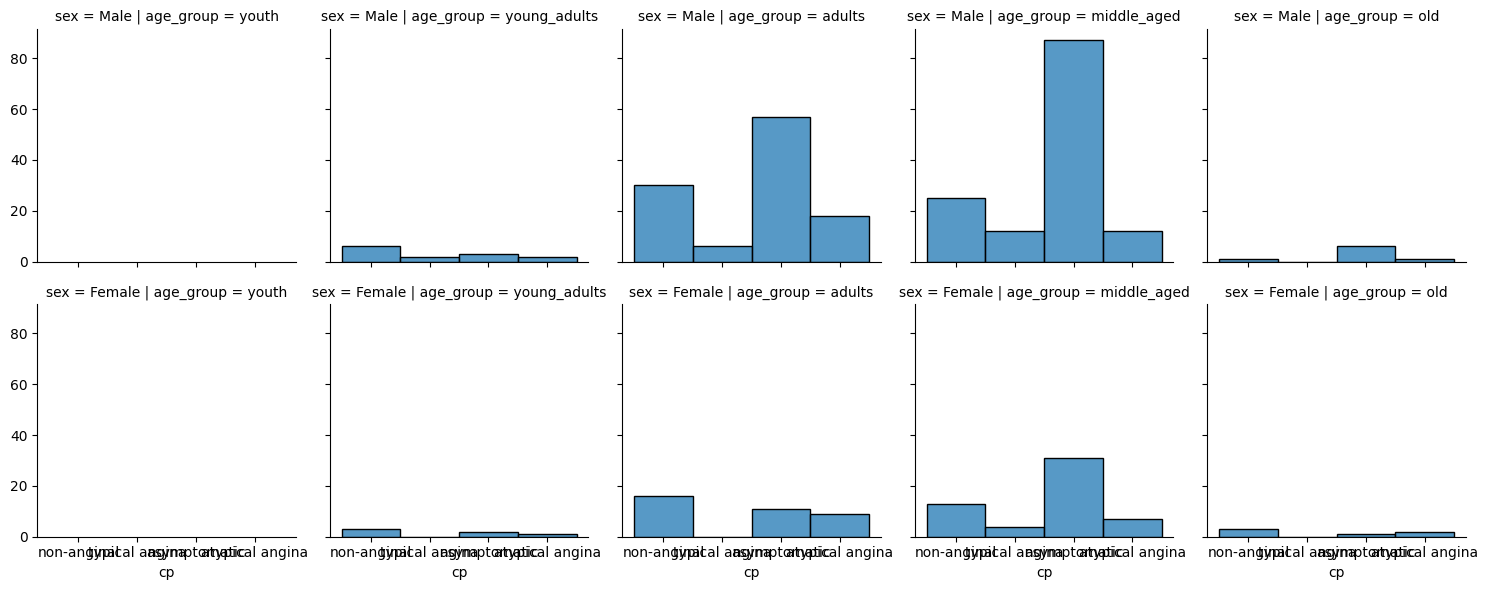

In [58]:
g=sns.FacetGrid(df_fhs, row='sex',col='age_group')
g.map(sns.histplot,'cp')
plt.show()

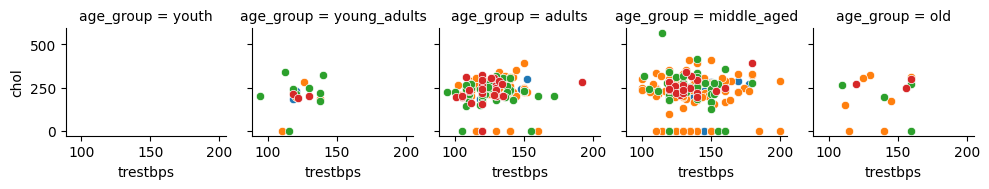

In [59]:
g=sns.FacetGrid(df_fhs,hue='cp',col='age_group',height=2)
g.map(sns.scatterplot,"trestbps","chol")
plt.show()

In [60]:
fhs_cont.corr()

,trestbps,chol,thalch,oldpeak,ca
trestbps,1.000,0.038,-0.084,0.156,0.086
chol,0.038,1.000,0.373,0.152,0.058
thalch,-0.084,0.373,1.000,-0.199,-0.206
oldpeak,0.156,0.152,-0.199,1.000,0.272
ca,0.086,0.058,-0.206,0.272,1.000


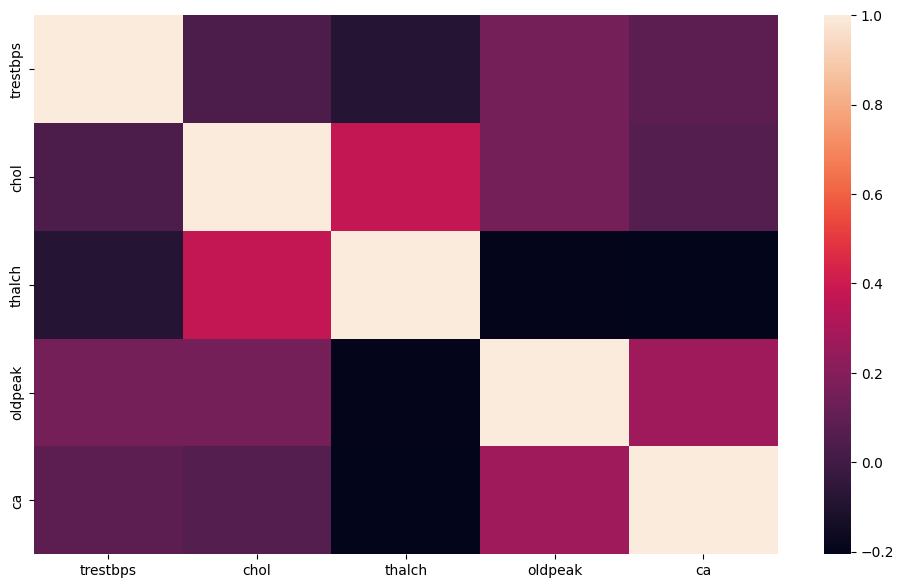

In [61]:
plt.figure(figsize=(12,7))
sns.heatmap(fhs_cont.corr())
plt.show()

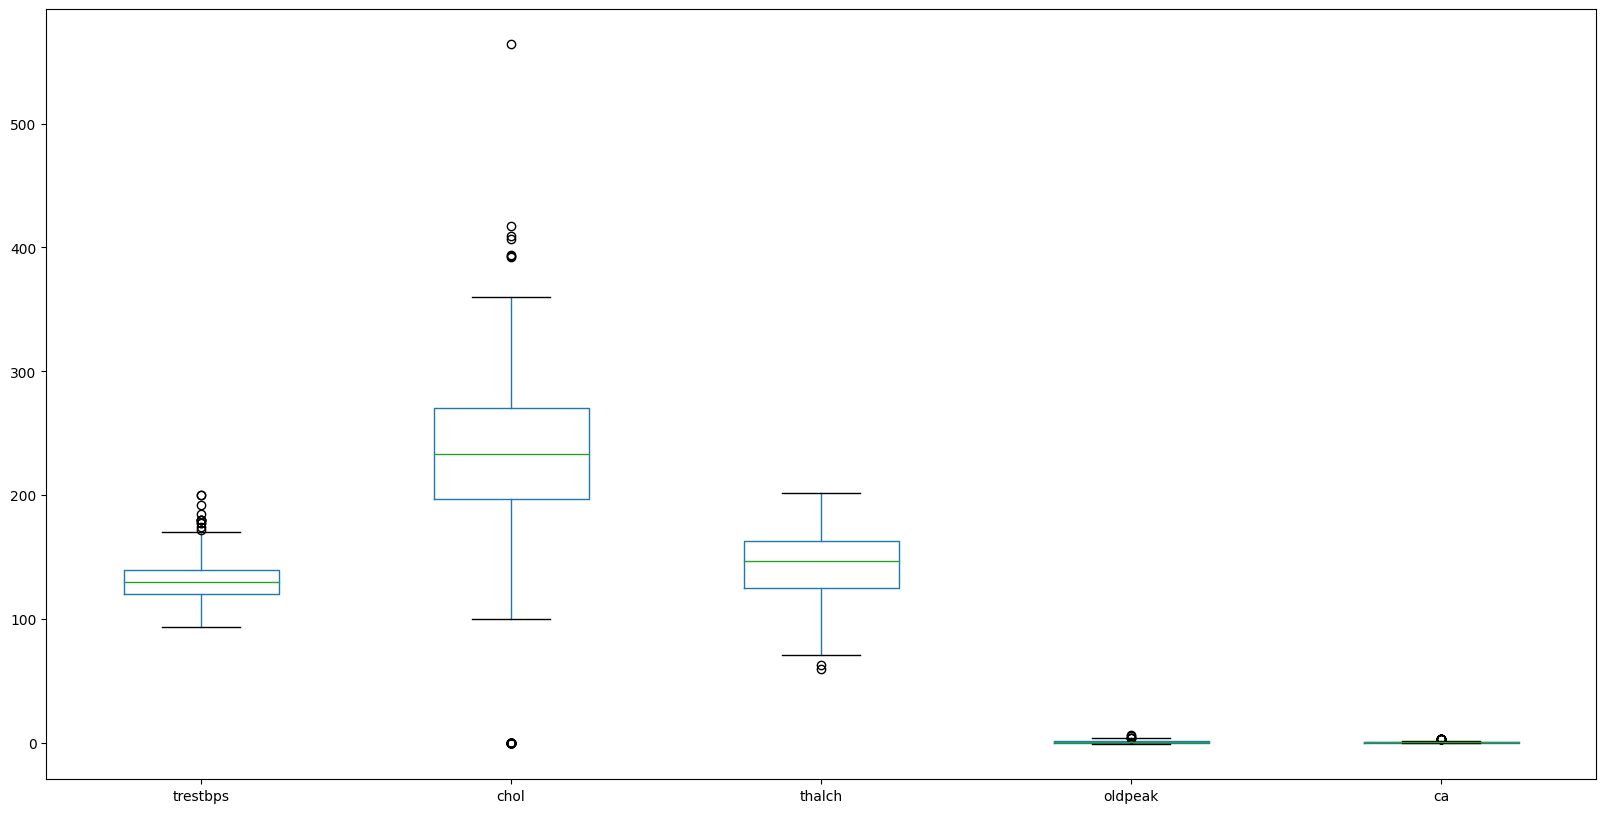

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
fhs_cont.boxplot(grid=False)
plt.show()


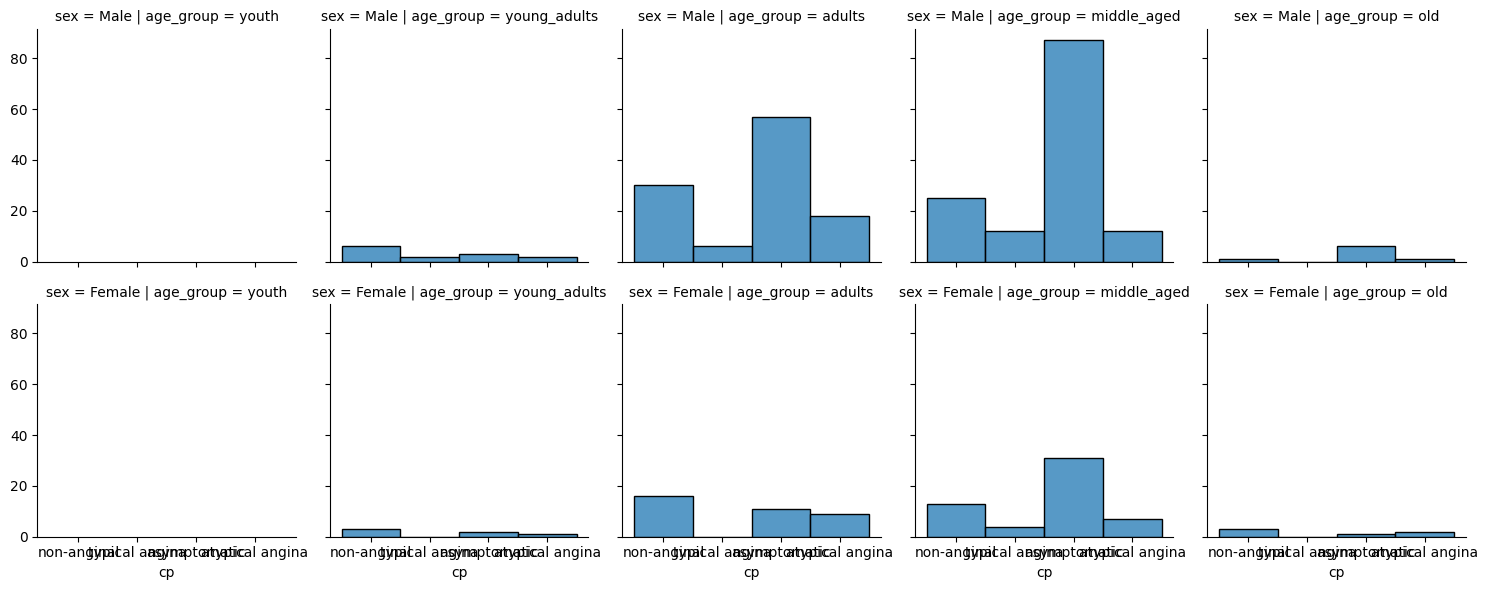

In [63]:
g=sns.FacetGrid(df_fhs,row="sex",col='age_group')
g.map(sns.histplot,'cp')
plt.show()

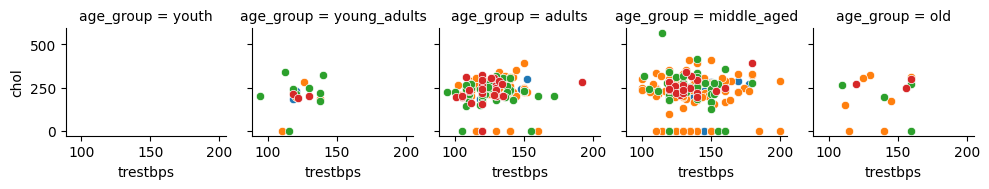

In [64]:
g=sns.FacetGrid(df_fhs,hue='cp',col='age_group',height=2)
g.map(sns.scatterplot,"trestbps","chol")
plt.show()

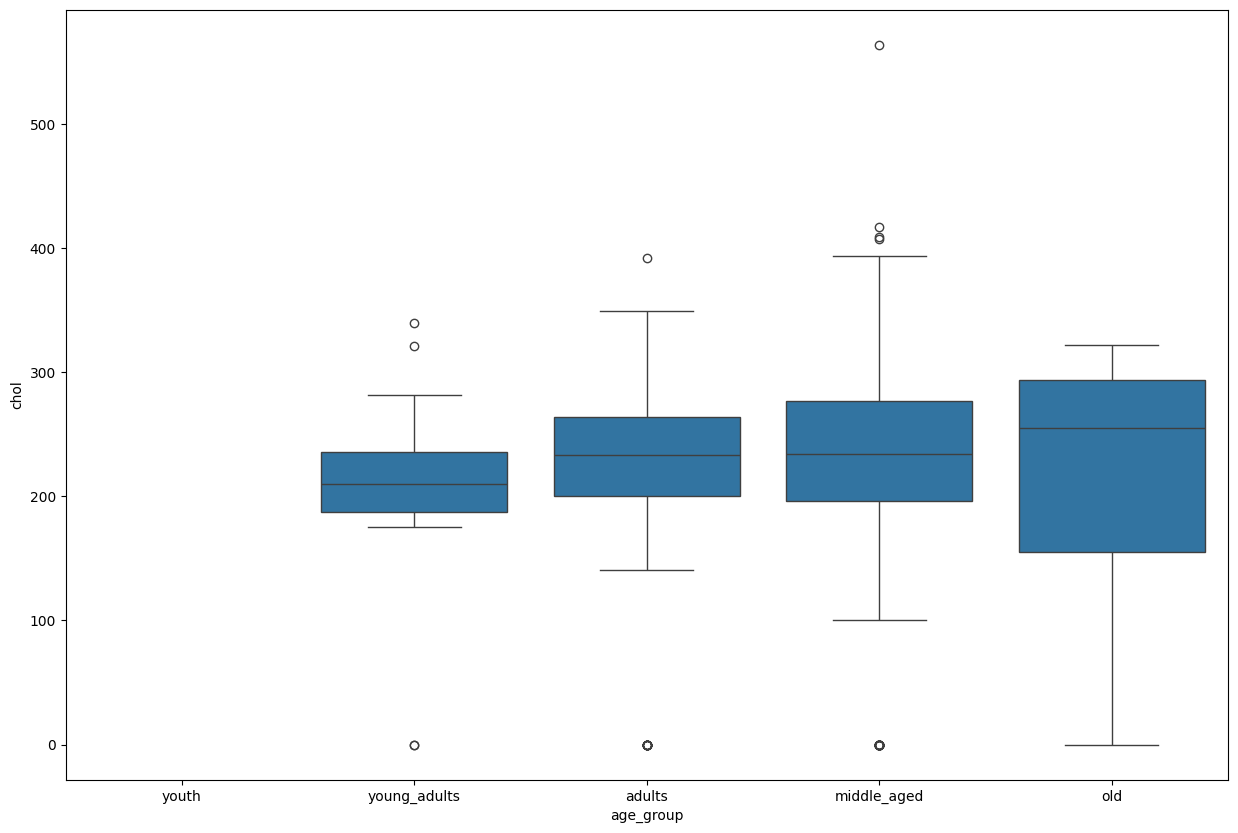

In [65]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df_fhs,x="age_group",y="chol",ax=ax)
plt.show()

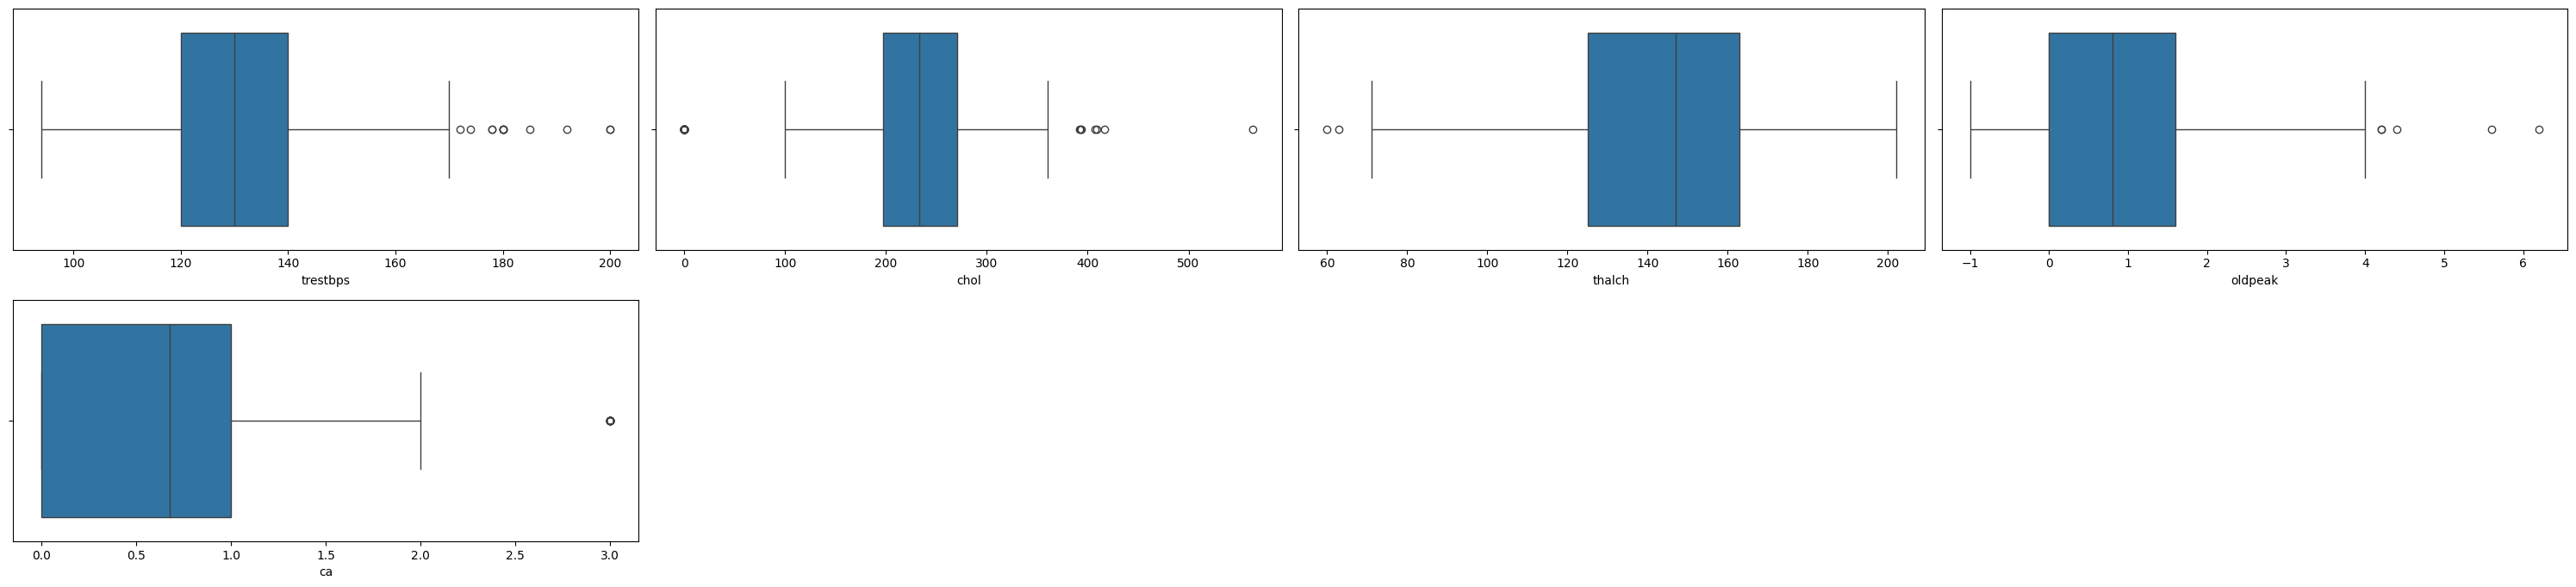

In [66]:
plt.figure(figsize=(30,20))
for i in enumerate(fhs_cont.columns):
  plt.subplot(6,4,i[0]+1)
  sns.boxplot(x=i[1],data=fhs_cont)
plt.tight_layout()

In [67]:
df_fhs['cp'].value_counts(normalize=True)

asymptomatic      0.534
non-anginal       0.261
atypical angina   0.140
typical angina    0.065
Name: cp, dtype: float64

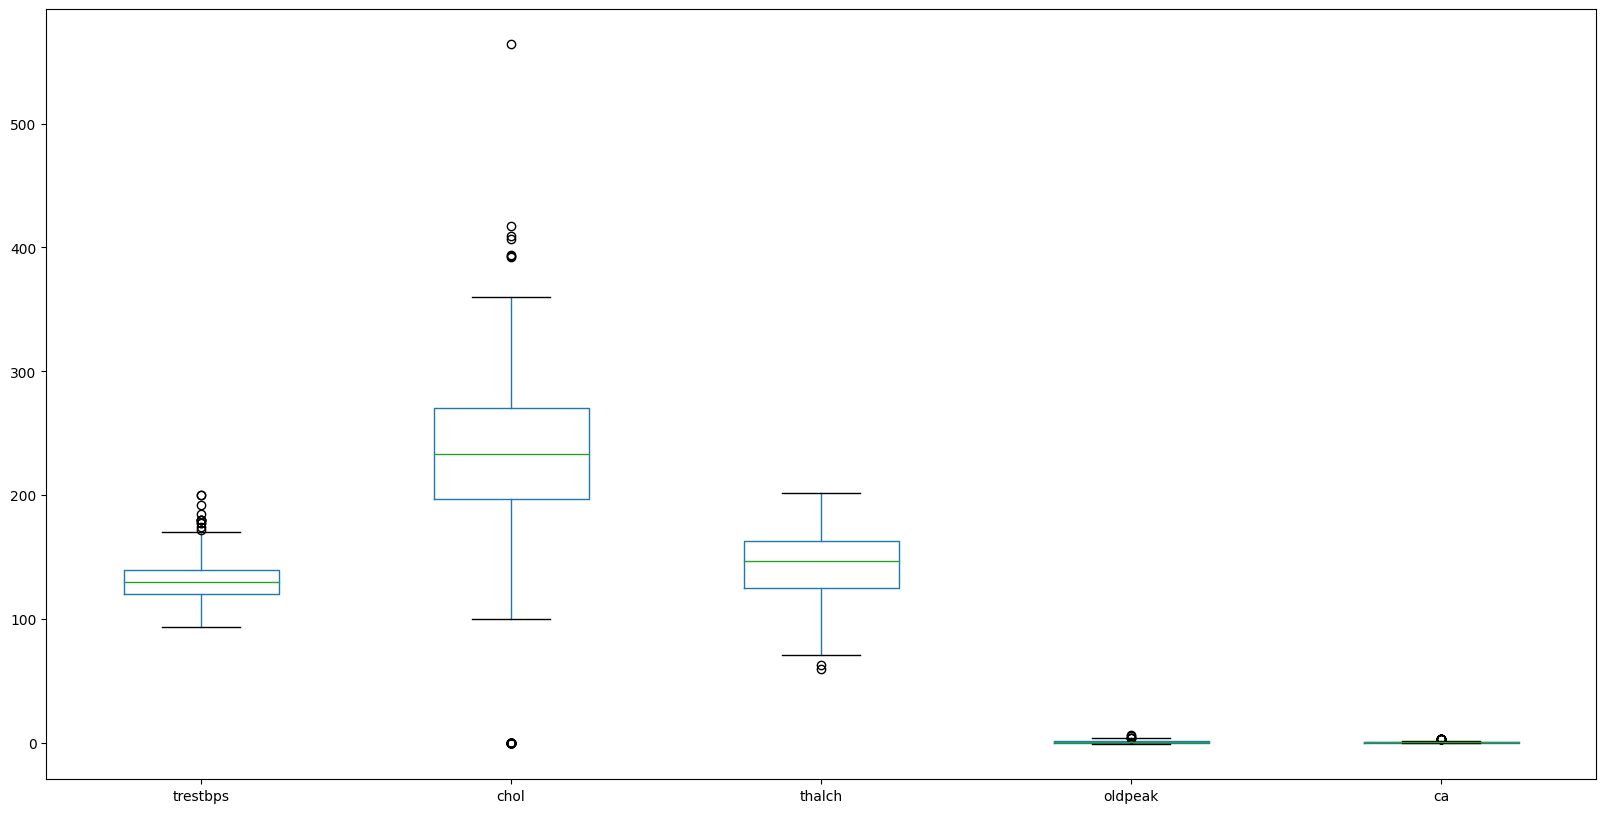

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
fhs_cont.boxplot(grid=False)
plt.show()


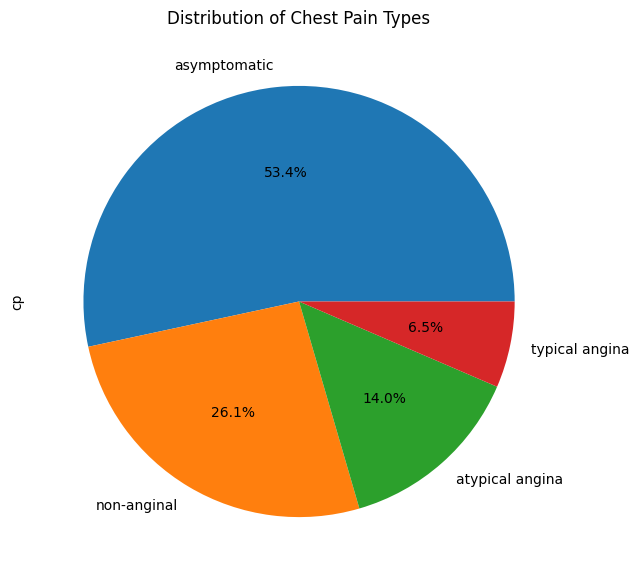

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
df_fhs['cp'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Chest Pain Types')
plt.show()


In [85]:
X = df_fhs.drop(columns='chol', axis=1)
Y = df_fhs['chol']

In [86]:
print(X)

      id    age     sex        dataset               cp  trestbps    fbs  \
0      1  56-70    Male      Cleveland   typical angina   145.000   True   
1      2  56-70    Male      Cleveland     asymptomatic   160.000  False   
2      3  56-70    Male      Cleveland     asymptomatic   120.000  False   
3      4  26-40    Male      Cleveland      non-anginal   130.000  False   
4      5  41-55  Female      Cleveland  atypical angina   130.000  False   
..   ...    ...     ...            ...              ...       ...    ...   
890  891  41-55    Male  VA Long Beach     asymptomatic   124.000  False   
891  892  26-40    Male  VA Long Beach      non-anginal   118.000  False   
892  893  56-70    Male  VA Long Beach     asymptomatic   140.000  False   
902  903  56-70    Male  VA Long Beach     asymptomatic   120.000  False   
903  904  56-70    Male  VA Long Beach     asymptomatic   130.000   True   

              restecg  thalch  exang  oldpeak  slope    ca  thal     age_group  
0     

In [88]:
from sklearn.model_selection import train_test_split
import numpy as np
mask = ~np.isnan(Y)
X = X[mask]
Y = Y[mask]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [89]:
print(X.shape, X_train.shape, X_test.shape)

(371, 15) (296, 15) (75, 15)


In [116]:
from sklearn.svm import SVC

In [130]:
df_fhs.rename(columns={'age': 'age_new'}, inplace=False)

,id,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,age_group
0,1,Male,Cleveland,typical angina,145.000,233.000,True,lv hypertrophy,150.000,False,2.300,1,0.000,1,middle_aged
1,2,Male,Cleveland,asymptomatic,160.000,286.000,False,lv hypertrophy,108.000,True,1.500,2,3.000,2,middle_aged
2,3,Male,Cleveland,asymptomatic,120.000,229.000,False,lv hypertrophy,129.000,True,2.600,2,2.000,3,middle_aged
3,4,Male,Cleveland,non-anginal,130.000,250.000,False,normal,187.000,False,3.500,1,0.000,2,young_adults
4,5,Female,Cleveland,atypical angina,130.000,204.000,False,lv hypertrophy,172.000,False,1.400,3,0.000,2,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,Male,VA Long Beach,asymptomatic,124.000,243.000,False,normal,122.000,True,2.000,2,0.676,3,adults
891,892,Male,VA Long Beach,non-anginal,118.000,240.000,False,lv hypertrophy,165.000,False,1.000,2,0.676,2,young_adults
892,893,Male,VA Long Beach,asymptomatic,140.000,219.000,False,st-t abnormality,122.000,True,2.000,2,0.676,3,middle_aged
902,903,Male,VA Long Beach,asymptomatic,120.000,226.000,False,lv hypertrophy,127.000,True,1.700,1,0.676,3,middle_aged


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC()

svm_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


ValueError: could not convert string to float: '56-70'